# pima-indians-diabetes-database

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0%|                                               | 0.00/8.91k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 8.91k/8.91k [00:00<00:00, 30.4MB/s]
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
print(df.shape)

(768, 9)


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
y_data = df[['Outcome']].values
df.drop('Outcome', axis=1, inplace=True)
X_data = df.values

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [13]:
X_data = torch.Tensor(X_data)
y_data = torch.LongTensor(y_data)
y_data = y_data.squeeze()

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # train과 test를 8:2로 분할

In [15]:
class PIDDModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(PIDDModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        result = F.softmax(output, dim=1)
        with torch.no_grad():
            value = torch.argmax(result, dim=1)
        return result, value        

In [16]:
model = PIDDModel(8, 2)

In [17]:
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[0], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[0])

tensor([[1.1907e-19, 1.0000e+00]])
tensor(1.)
tensor(1) tensor(0)


In [18]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
print(model)

PIDDModel(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [20]:
model = PIDDModel(8, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 1000 # 1000회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    y, _ = model(X_train)
    target = y_train
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 0.8869887590408325
epoch 100th loss: 0.6610000729560852
epoch 200th loss: 0.6592376828193665
epoch 300th loss: 0.6585071682929993
epoch 400th loss: 0.6581590175628662
epoch 500th loss: 0.6579369902610779
epoch 600th loss: 0.6577593088150024
epoch 700th loss: 0.6575982570648193
epoch 800th loss: 0.6574421525001526
epoch 900th loss: 0.6523013710975647


In [21]:
n = 5
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[1.0000e+00, 1.9694e-09]])
tensor(1.)
tensor(0) tensor(0)


In [34]:
model = PIDDModel(8, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 2000 # 2000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y, _ = model(X_train)
    target = y_train
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        model.eval()
        y_pred, _ = model(X_test)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 0.9170114994049072 test loss: 0.8973357081413269
epoch 100th training loss: 0.6650840640068054 test loss: 0.6379427909851074
epoch 200th training loss: 0.6650616526603699 test loss: 0.6379445195198059
epoch 300th training loss: 0.664425253868103 test loss: 0.6381903290748596
epoch 400th training loss: 0.6626864671707153 test loss: 0.6375943422317505
epoch 500th training loss: 0.6623280048370361 test loss: 0.6364964842796326
epoch 600th training loss: 0.6621484756469727 test loss: 0.6359699368476868
epoch 700th training loss: 0.6620475649833679 test loss: 0.6354148387908936
epoch 800th training loss: 0.6619853377342224 test loss: 0.6351038813591003
epoch 900th training loss: 0.6619428992271423 test loss: 0.634814977645874
epoch 1000th training loss: 0.6619133949279785 test loss: 0.6346803903579712
epoch 1100th training loss: 0.6618912220001221 test loss: 0.6345200538635254
epoch 1200th training loss: 0.6618747711181641 test loss: 0.6343546509742737
epoch 1300th 

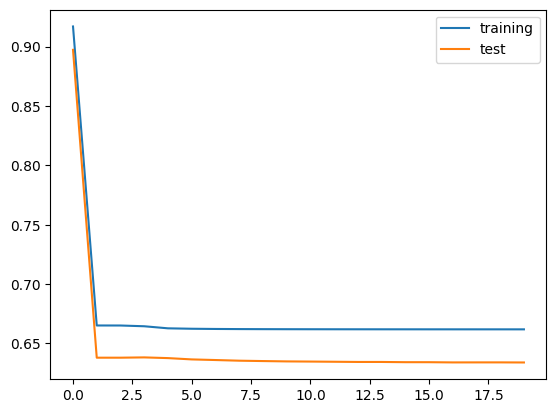

In [35]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    _ , y_pred = model(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)

0.6818181818181818
